In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trainValue = pd.read_csv("train_values.csv")
testValue = pd.read_csv("test_values.csv")
trainLabel = pd.read_csv("train_labels.csv")
trainLabel.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [3]:
trainLabel.apply(lambda x: sum(x.isnull()))

row_id      0
accepted    0
dtype: int64

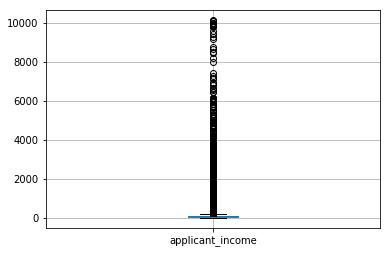

In [4]:

trainValue.boxplot(column='applicant_income') 

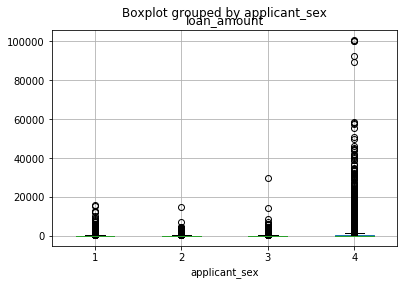

In [5]:
trainValue.boxplot(column='loan_amount', by = 'applicant_sex') 

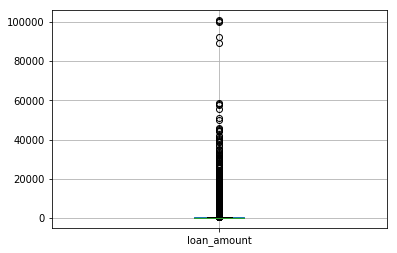

In [6]:
trainValue.boxplot(column='loan_amount') 

In [7]:
pd.crosstab(trainValue ['county_code'], trainLabel ['accepted'], margins=True)

accepted,0,1,All
county_code,,,
-1,19752,714,20466
1,137,143,280
2,1177,1326,2503
3,3440,4125,7565
4,2,1,3
5,97,82,179
6,397,458,855
7,1921,1939,3860
8,9,12,21


In [8]:
trainValue.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [9]:
testValue.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,3,1,115.0,3,101,16,276,...,1,NaN,6329.0,59.536,69889.0,85.78,1874.0,2410.0,3791,True
1,1,1,1,1,1,252.0,2,87,20,68,...,1,107.0,2473.0,8.050,65313.0,100.00,947.0,1214.0,2839,True
2,2,1,1,1,1,270.0,1,-1,-1,-1,...,2,119.0,NaN,NaN,NaN,NaN,NaN,NaN,4701,False
3,3,2,1,1,1,179.0,2,376,20,11,...,2,44.0,4795.0,29.676,57766.0,100.00,1426.0,1765.0,2153,True
4,4,2,1,1,1,36.0,2,254,48,156,...,3,32.0,5246.0,5.110,63332.0,100.00,1452.0,2092.0,5710,False


## data cleaning 


In [10]:
trainValue.apply(lambda x: sum(x.isnull()))

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [11]:
testValue.apply(lambda x: sum(x.isnull()))

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

In [12]:
trainValue.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [13]:
#Combining both train and test dataset

#Create a flag for Train and Test Data set
trainValue['Type']='Train' 
testValue['Type']='Test'
fullData = pd.concat([trainValue,testValue],axis=0, sort=True)

#Look at the available missing values in the dataset
fullData.isnull().sum()

Type                                  0
applicant_ethnicity                   0
applicant_income                  80089
applicant_race                        0
applicant_sex                         0
co_applicant                          0
county_code                           0
ffiecmedian_family_income         44893
lender                                0
loan_amount                           0
loan_purpose                          0
loan_type                             0
minority_population_pct           44948
msa_md                                0
number_of_1_to_4_family_units     45080
number_of_owner-occupied_units    45139
occupancy                             0
population                        44945
preapproval                           0
property_type                         0
row_id                                0
state_code                            0
tract_to_msa_md_income_pct        45031
dtype: int64

In [14]:
fullData['applicant_income'].fillna(fullData['applicant_income'].mean(), inplace=True)
fullData['population'].fillna(fullData['population'].mean(), inplace=True)
fullData['minority_population_pct'].fillna(fullData['minority_population_pct'].mean(), inplace=True)
fullData['ffiecmedian_family_income'].fillna(fullData['ffiecmedian_family_income'].mean(), inplace=True)
fullData['tract_to_msa_md_income_pct'].fillna(fullData['tract_to_msa_md_income_pct'].mean(), inplace=True)
fullData['number_of_owner-occupied_units'].fillna(fullData['number_of_owner-occupied_units'].mean(), inplace=True)
fullData['number_of_1_to_4_family_units'].fillna(fullData['number_of_1_to_4_family_units'].mean(), inplace=True)

In [15]:
fullData.isnull().sum()

Type                              0
applicant_ethnicity               0
applicant_income                  0
applicant_race                    0
applicant_sex                     0
co_applicant                      0
county_code                       0
ffiecmedian_family_income         0
lender                            0
loan_amount                       0
loan_purpose                      0
loan_type                         0
minority_population_pct           0
msa_md                            0
number_of_1_to_4_family_units     0
number_of_owner-occupied_units    0
occupancy                         0
population                        0
preapproval                       0
property_type                     0
row_id                            0
state_code                        0
tract_to_msa_md_income_pct        0
dtype: int64

In [16]:
trainValue.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
Type                               object
dtype: object

In [17]:
fullData.dtypes

Type                               object
applicant_ethnicity                 int64
applicant_income                  float64
applicant_race                      int64
applicant_sex                       int64
co_applicant                         bool
county_code                         int64
ffiecmedian_family_income         float64
lender                              int64
loan_amount                       float64
loan_purpose                        int64
loan_type                           int64
minority_population_pct           float64
msa_md                              int64
number_of_1_to_4_family_units     float64
number_of_owner-occupied_units    float64
occupancy                           int64
population                        float64
preapproval                         int64
property_type                       int64
row_id                              int64
state_code                          int64
tract_to_msa_md_income_pct        float64
dtype: object

In [18]:
# Convert all non-numeric values to number
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
fullData['co_applicant']=le.fit_transform(fullData['co_applicant'].astype('str'))
fullData.dtypes

Type                               object
applicant_ethnicity                 int64
applicant_income                  float64
applicant_race                      int64
applicant_sex                       int64
co_applicant                        int32
county_code                         int64
ffiecmedian_family_income         float64
lender                              int64
loan_amount                       float64
loan_purpose                        int64
loan_type                           int64
minority_population_pct           float64
msa_md                              int64
number_of_1_to_4_family_units     float64
number_of_owner-occupied_units    float64
occupancy                           int64
population                        float64
preapproval                         int64
property_type                       int64
row_id                              int64
state_code                          int64
tract_to_msa_md_income_pct        float64
dtype: object

## Generic Classification Function

## Building Model

In [21]:

fullData['applicant_income']=np.log(fullData['applicant_income']) 
fullData['population']=np.log(fullData['population'])
fullData['minority_population_pct']=np.log(fullData['minority_population_pct']) 
fullData['ffiecmedian_family_income']=np.log(fullData['ffiecmedian_family_income']) 
fullData['tract_to_msa_md_income_pct']=np.log(fullData['tract_to_msa_md_income_pct']) 
fullData['number_of_1_to_4_family_units']=np.log(fullData['number_of_1_to_4_family_units']) 
fullData['number_of_owner-occupied_units']=np.log(fullData['number_of_owner-occupied_units']) 
fullData['loan_amount']=np.log(fullData['loan_amount'])  

fullData.head()

,Type,applicant_ethnicity,applicant_income,applicant_race,applicant_sex,co_applicant,county_code,ffiecmedian_family_income,lender,loan_amount,...,msa_md,number_of_1_to_4_family_units,number_of_owner-occupied_units,occupancy,population,preapproval,property_type,row_id,state_code,tract_to_msa_md_income_pct
0,Train,2,3.178054,5,1,0,246,11.011852,4536,4.248495,...,18,7.879291,6.573680,1,8.732788,3,1,0,37,3.930511
1,Train,1,4.043051,5,1,0,299,10.911829,2458,5.181784,...,369,7.653495,7.391415,1,8.661120,3,1,1,52,4.605170
2,Train,2,4.204693,5,1,0,306,11.123122,5710,5.093750,...,16,6.954639,6.633318,1,8.715060,3,1,2,10,4.605170
3,Train,2,4.653960,5,1,1,180,11.270077,5888,5.043425,...,305,7.740230,7.613325,1,8.804925,1,1,3,47,4.605170
4,Train,2,4.262680,3,2,0,20,11.052080,289,5.720312,...,24,7.521318,7.288928,1,8.814628,3,1,4,37,4.409155


## Logistic Regression

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
trainLabel["accepted"] = le.fit_transform(trainLabel["accepted"].astype('str'))
trainLabel.describe()

,row_id,accepted
count,500000.000000,500000.000000
mean,249999.500000,0.500228
std,144337.711634,0.500000
min,0.000000,0.000000
25%,124999.750000,0.000000
50%,249999.500000,1.000000
75%,374999.250000,1.000000
max,499999.000000,1.000000


In [23]:
train_modified.head()

,Type,applicant_ethnicity,applicant_income,applicant_race,applicant_sex,co_applicant,county_code,ffiecmedian_family_income,lender,loan_amount,...,msa_md,number_of_1_to_4_family_units,number_of_owner-occupied_units,occupancy,population,preapproval,property_type,row_id,state_code,tract_to_msa_md_income_pct
0,Train,2,3.178054,5,1,0,246,11.011852,4536,4.248495,...,18,7.879291,6.573680,1,8.732788,3,1,0,37,3.930511
1,Train,1,4.043051,5,1,0,299,10.911829,2458,5.181784,...,369,7.653495,7.391415,1,8.661120,3,1,1,52,4.605170
2,Train,2,4.204693,5,1,0,306,11.123122,5710,5.093750,...,16,6.954639,6.633318,1,8.715060,3,1,2,10,4.605170
3,Train,2,4.653960,5,1,1,180,11.270077,5888,5.043425,...,305,7.740230,7.613325,1,8.804925,1,1,3,47,4.605170
4,Train,2,4.262680,3,2,0,20,11.052080,289,5.720312,...,24,7.521318,7.288928,1,8.814628,3,1,4,37,4.409155


In [24]:
test_modified.head()

,Type,applicant_ethnicity,applicant_income,applicant_race,applicant_sex,co_applicant,county_code,ffiecmedian_family_income,lender,loan_amount,...,msa_md,number_of_1_to_4_family_units,number_of_owner-occupied_units,occupancy,population,preapproval,property_type,row_id,state_code,tract_to_msa_md_income_pct
0,Test,2,4.626521,5,1,1,276,11.154664,3791,4.744932,...,101,7.787382,7.535830,1,8.752898,3,1,0,16,4.451786
1,Test,2,4.672829,5,1,1,68,11.086946,2839,5.529429,...,87,7.101676,6.853299,1,7.813187,2,1,1,20,4.605170
2,Test,2,4.779123,1,2,0,-1,11.145404,4701,5.598422,...,-1,7.541951,7.263427,1,8.596747,1,1,2,-1,4.519863
3,Test,2,3.784190,2,2,1,11,10.964156,2153,5.187386,...,376,7.475906,7.262629,1,8.475329,2,1,3,20,4.605170
4,Test,3,3.465736,6,3,0,156,11.056146,5710,3.583519,...,254,7.645876,7.280697,1,8.565221,2,1,4,48,4.605170


In [25]:



predictors_Logistic=['number_of_owner-occupied_units','number_of_1_to_4_family_units','minority_population_pct',
                     'loan_amount','ffiecmedian_family_income','applicant_income','tract_to_msa_md_income_pct',
                     'state_code','property_type','preapproval','occupancy','msa_md','loan_type','loan_purpose','lender','county_code',
                    'co_applicant','applicant_sex','applicant_race','applicant_ethnicity']


x_train = train_modified[list(predictors_Logistic)].values
y_train = trainLabel["accepted"].values

x_test=test_modified[list(predictors_Logistic)].values


In [26]:

x_test

array([[7.53583046, 7.78738203, 4.08658117, ..., 1.        , 5.        ,
        2.        ],
       [6.85329909, 7.10167597, 2.08567209, ..., 1.        , 5.        ,
        2.        ],
       [7.26342706, 7.5419511 , 3.45393027, ..., 2.        , 1.        ,
        2.        ],
       ...,
       [6.4035742 , 6.8814113 , 2.45375992, ..., 1.        , 5.        ,
        2.        ],
       [8.22684089, 8.40447232, 3.3452265 , ..., 3.        , 6.        ,
        3.        ],
       [7.12849595, 7.40367029, 2.98659062, ..., 1.        , 5.        ,
        2.        ]])

In [27]:
x_train

array([[6.57368017, 7.87929149, 3.78940329, ..., 1.        , 5.        ,
        2.        ],
       [7.39141523, 7.65349491, 2.76663353, ..., 1.        , 5.        ,
        1.        ],
       [6.63331843, 6.95463886, 4.11529033, ..., 1.        , 5.        ,
        2.        ],
       ...,
       [6.9679092 , 7.47420481, 3.5847959 , ..., 1.        , 3.        ,
        3.        ],
       [6.42648846, 7.16780918, 4.59389688, ..., 1.        , 5.        ,
        1.        ],
       [7.32974969, 7.91935619, 2.49279214, ..., 2.        , 5.        ,
        2.        ]])

In [28]:
y_train

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
from catboost import Pool, CatBoostClassifier

train_data = [["summer", 1924, 44],
              ["summer", 1932, 37],
              ["winter", 1980, 37],
              ["summer", 2012, 204]]

eval_data = [["winter", 1996, 197],
             ["winter", 1968, 37],
             ["summer", 2002, 77],
             ["summer", 1948, 59]]

cat_features = [0]

train_label = ["France", "USA", "USA", "UK"]
eval_label = ["USA", "France", "USA", "UK"]
train_dataset = Pool(data=train_data,
                     label=train_label,
                     cat_features=cat_features)

eval_dataset = Pool(data=eval_data,
                    label=eval_label,
                    cat_features=cat_features)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')
# Fit model
model.fit(train_dataset)
# Get predicted classes
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset, 
                          prediction_type='RawFormulaVal')

In [29]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = le.inverse_transform(predicted)

#Store it to test dataset
trainLabel['accepted']=predicted

outcome_var = 'accepted'

classification_model(model,train_modified ,trainLabel,predictors_Logistic,outcome_var)

trainLabel.to_csv("prediction.csv",columns=['row_id','accepted'])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 51.430%


TypeError: 'KFold' object is not iterable

In [ ]:
predict = pd.read_csv("prediction.csv")

In [ ]:
predict